In [1]:
# %pip install numpy pandas matplotlib seaborn scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [2]:
# Load dataset
df = pd.read_csv("fraud.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
# Data Overview
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
None
               step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04

In [4]:
# Check for missing values
print(df.isnull().sum())     #there are no missing values, we can proceed with data preprocessing, feature engineering, and model training.

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [5]:
print(f"Duplicate rows: {df.duplicated().sum()}")
#there are no duplicate rows, we can move forward with data exploration, feature engineering, and model training.


Duplicate rows: 0


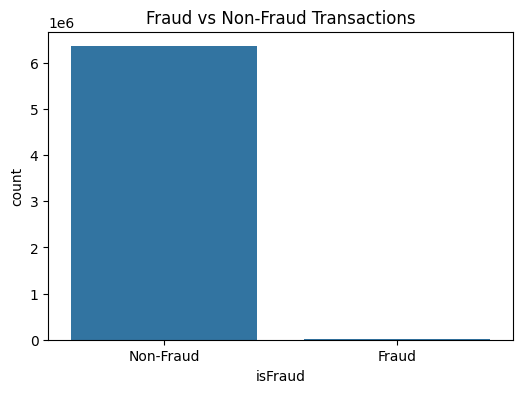

In [7]:
#Check for Class Imbalance (Fraud vs Non-Fraud Transactions)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(x=df['isFraud'])
plt.title("Fraud vs Non-Fraud Transactions")
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.show()



#Fraud vs Non-Fraud Transactions bar chart clearly shows extreme class imbalance. Fraudulent transactions are significantly fewer 
# compared to non-fraudulent ones.

In [8]:
print(df['isFraud'].value_counts())

isFraud
0    6354407
1       8213
Name: count, dtype: int64


# Steps to Handle Imbalance
- Separate Features and Target → Extract X (independent variables) and y (target variable).

- Split Data → Use train_test_split() to split data into training and testing sets.

- Apply SMOTE (Oversampling) → Generate synthetic fraud cases to balance classes.

- Apply Undersampling → Reduce the number of non-fraud cases to improve balance.

- Train ML Model → Train a classifier on the balanced dataset.

In [9]:
# SMOTE → Adds synthetic fraud cases to balance the dataset.

# Random Undersampling → Removes some non-fraud cases to improve balance.

# Pipeline → Ensures data transformation is done seamlessly.

# Install the imbalanced-learn package
# %pip install imbalanced-learn

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder  # Import for encoding categorical data



In [10]:
# Step 1: Encode categorical feature ('type')
#Data Preprocessing
label_encoder = LabelEncoder()
df['type'] = label_encoder.fit_transform(df['type'])
df


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,3,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,4,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,3,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,4,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,1,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,4,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [11]:
# Step 2: Extract Features (X) and Target (y)
X = df.drop(columns=['isFraud', 'nameOrig', 'nameDest'])
y = df['isFraud']


In [12]:
X

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,1,3,9839.64,170136.00,160296.36,0.00,0.00,0
1,1,3,1864.28,21249.00,19384.72,0.00,0.00,0
2,1,4,181.00,181.00,0.00,0.00,0.00,0
3,1,1,181.00,181.00,0.00,21182.00,0.00,0
4,1,3,11668.14,41554.00,29885.86,0.00,0.00,0
...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,339682.13,0.00,0.00,339682.13,0
6362616,743,4,6311409.28,6311409.28,0.00,0.00,0.00,0
6362617,743,1,6311409.28,6311409.28,0.00,68488.84,6379898.11,0
6362618,743,4,850002.52,850002.52,0.00,0.00,0.00,0


In [13]:
y

0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362620, dtype: int64

In [14]:
# Step 3: Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [15]:
# Step 4: Apply SMOTE + Undersampling
smote = SMOTE(sampling_strategy=0.5, random_state=42)
undersample = RandomUnderSampler(sampling_strategy=0.5, random_state=42)


In [16]:
# Step 5: Create Pipeline and Fit
resampling_pipeline = Pipeline([('smote', smote), ('undersample', undersample)])
X_train_resampled, y_train_resampled = resampling_pipeline.fit_resample(X_train, y_train)


In [17]:
# Print Class Distribution After Resampling
print("Before Resampling:\n", y_train.value_counts())
print("After Resampling:\n", pd.Series(y_train_resampled).value_counts())


Before Resampling:
 isFraud
0    5083526
1       6570
Name: count, dtype: int64
After Resampling:
 isFraud
0    5083526
1    2541763
Name: count, dtype: int64


In [18]:
#Feature Scaling & Data Normalization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)  # Apply the same transformation to test data



In [19]:
#Train Fraud Detection Models
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier with fewer estimators and n_jobs=-1
rf_model = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1, class_weight='balanced')

# Fit the model
rf_model.fit(X_train_resampled, y_train_resampled)

# Make Predictions
y_pred_rf = rf_model.predict(X_test)
print("Predictions:", y_pred_rf)


Predictions: [0 0 0 ... 0 0 0]


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize Logistic Regression model
logreg_model = LogisticRegression(solver='liblinear', random_state=42)

# Fit the model on the resampled training data
logreg_model.fit(X_train_resampled, y_train_resampled)

# Make Predictions
y_pred_logreg = logreg_model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred_logreg))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99   1270881
           1       0.06      0.85      0.11      1643

    accuracy                           0.98   1272524
   macro avg       0.53      0.92      0.55   1272524
weighted avg       1.00      0.98      0.99   1272524



In [21]:
# %pip install xgboost
import xgboost as xgb
from sklearn.metrics import classification_report

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Fit the model on the resampled training data
xgb_model.fit(X_train_resampled, y_train_resampled)

# Make Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred_xgb))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.42      0.99      0.59      1643

    accuracy                           1.00   1272524
   macro avg       0.71      0.99      0.79   1272524
weighted avg       1.00      1.00      1.00   1272524



In [22]:
y_pred_xgb_prob = xgb_model.predict_proba(X_test)[:, 1]
y_pred_xgb_adjusted = (y_pred_xgb_prob > 0.3).astype(int)  # Adjust threshold to 0.3 or other values


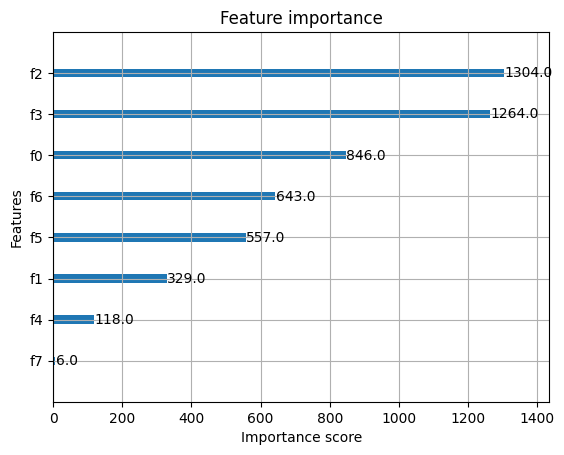

In [23]:
import matplotlib.pyplot as plt
xgb.plot_importance(xgb_model)
plt.show()


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_dist = {
    'learning_rate': np.linspace(0.01, 0.2, 5),
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'subsample': np.linspace(0.7, 0.9, 3),
    'colsample_bytree': np.linspace(0.7, 0.9, 3)
}

random_search = RandomizedSearchCV(estimator=xgb.XGBClassifier(random_state=42), 
                                   param_distributions=param_dist, 
                                   n_iter=50, cv=3, 
                                   scoring='accuracy', 
                                   n_jobs=-1, verbose=2, 
                                   random_state=42)

random_search.fit(X_train_resampled, y_train_resampled)

# Get best parameters and model
print("Best Hyperparameters:", random_search.best_params_)
best_xgb_model = random_search.best_estimator_

# Predictions and classification report
y_pred_best_xgb = best_xgb_model.predict(X_test)
print(classification_report(y_test, y_pred_best_xgb))


Fitting 3 folds for each of 50 candidates, totalling 150 fits


In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Get precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, best_xgb_model.predict_proba(X_test)[:, 1])

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()
